In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv("../summary_data/original/all_tools_TRB.csv")
df = df.loc[~(df['frequency_TCR'] == 0)]
df

,Sample,CDR3,nReads_TCR,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,tissue,tissue_type,total_reads_TCR,total_reads_MIXCR,total_reads_IMREP,total_reads_TRUST4,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,repertoire_type,class
0,SRR5233637,CASSPRVTSGTYEQYF,32.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000010,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
1,SRR5233637,CASSYSDRGGQPQHF,13.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000004,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
2,SRR5233637,CASKVALGGETQYF,25.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000008,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
3,SRR5233637,CASRAPGTGTLGSPLHF,66.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000022,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
4,SRR5233637,CASSSGQGGPSTEAFF,52.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000017,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375300,sample14,CASSPRVAIVYNEQFF,4.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000005,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
375301,sample14,CASSYRQSGELFF,77.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000103,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
375302,sample14,CASSQGGSGGPGELFF,48.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000064,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
375303,sample14,CASSVSSGGFREVEQYF,15.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000020,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal


In [3]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['frequency_TCR'] > 0.01 and row['frequency_TCR'] <= 1:
        return 'Hyperexpanded'
    if row['frequency_TCR'] > 0.001 and row['frequency_TCR'] <= 0.01: 
        return 'Large'
    if row['frequency_TCR'] > 0.0001 and row['frequency_TCR'] <= 0.001:
        return 'Medium'
    if row['frequency_TCR'] > 0.00001 and row['frequency_TCR'] <= 0.0001:
        return 'Small'
    if row['frequency_TCR'] > 0 and row['frequency_TCR'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
df['clonotype_group'] = df.apply (lambda row: clonotype_group(row),axis=1)

In [4]:
TCR_abundance = df.groupby(['Sample','class','tissue_type','repertoire_type','clonotype_group']).agg({'frequency_TCR':'sum'}).reset_index().rename(columns={'frequency_TCR':"clonotype_abundance"})
TCR_abundance.loc[:,'clonotype_abundance'] = TCR_abundance['clonotype_abundance']*100
TCR_abundance

,Sample,class,tissue_type,repertoire_type,clonotype_group,clonotype_abundance
0,SRR5233637,T_cell_poor_polyclonal,T_cell_poor,polyclonal,Hyperexpanded,14.948539
1,SRR5233637,T_cell_poor_polyclonal,T_cell_poor,polyclonal,Large,29.978091
2,SRR5233637,T_cell_poor_polyclonal,T_cell_poor,polyclonal,Medium,21.883602
3,SRR5233637,T_cell_poor_polyclonal,T_cell_poor,polyclonal,Rare,9.226287
4,SRR5233637,T_cell_poor_polyclonal,T_cell_poor,polyclonal,Small,23.963481
...,...,...,...,...,...,...
73,sample14,T_cell_poor_polyclonal,T_cell_poor,polyclonal,Hyperexpanded,20.854331
74,sample14,T_cell_poor_polyclonal,T_cell_poor,polyclonal,Large,24.729687
75,sample14,T_cell_poor_polyclonal,T_cell_poor,polyclonal,Medium,42.340527
76,sample14,T_cell_poor_polyclonal,T_cell_poor,polyclonal,Rare,0.179942


In [5]:
mean1 = TCR_abundance.groupby(["repertoire_type",'clonotype_group'])["clonotype_abundance"].agg(["mean", "std"]) 
display(mean1)

mean        std
repertoire_type clonotype_group                      
monoclonal      Hyperexpanded    90.170577   1.914452
                Large             6.332581   8.140707
                Medium            0.744053   0.309850
                Rare              4.699741        NaN
                Small             6.325526   3.607847
polyclonal      Hyperexpanded    20.816665  20.309387
                Large            20.626082   7.745101
                Medium           39.230595  19.600196
                Rare              4.793096   9.342445
                Small            27.456015  17.752945

## sample01

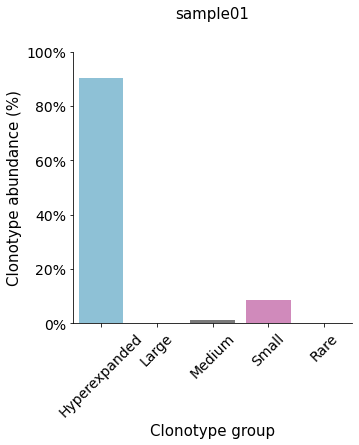

In [6]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample01 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample01']

plt.figure(figsize=(5,5))

ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample01, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample01',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3a.png",bbox_inches="tight")
plt.show()

## sample02

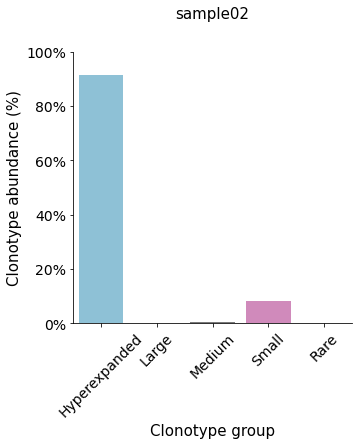

In [7]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample02 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample02']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample02, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample02',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3b.png",bbox_inches="tight")
plt.show() 

## sample03

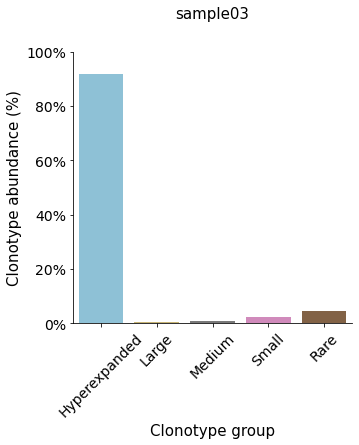

In [8]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample03 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample03']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample03, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample03',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3c.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3c.png",bbox_inches="tight")
plt.show() 

## sample13

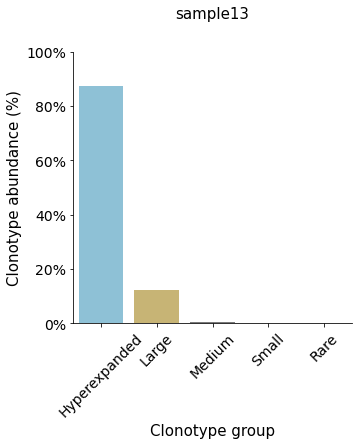

In [9]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample13 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample13']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample13, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample13',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3d.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3d.png",bbox_inches="tight")
plt.show() 

## sample04

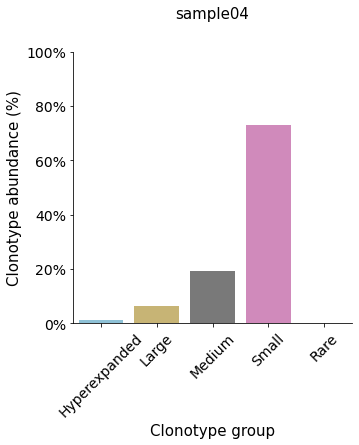

In [10]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample04 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample04']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample04, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample04',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3e.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3e.png",bbox_inches="tight")
plt.show()

## sample05

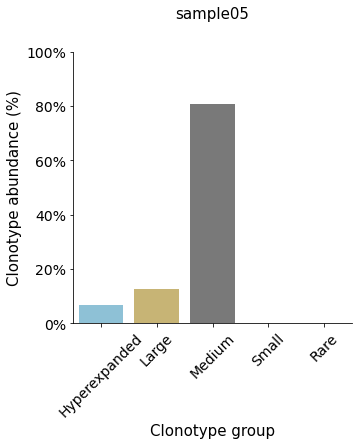

In [11]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample05 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample05']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample05, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample05',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3f.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3f.png",bbox_inches="tight")
plt.show()

## sample06

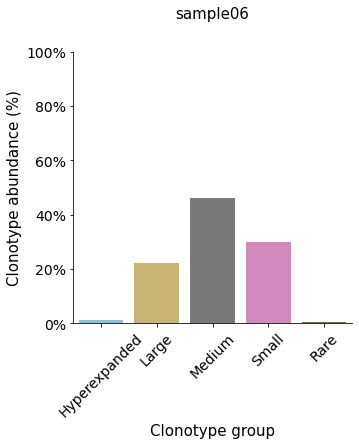

In [12]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample06 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample06']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample06, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample06',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3g.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3g.png",bbox_inches="tight")
plt.show()

## sample07

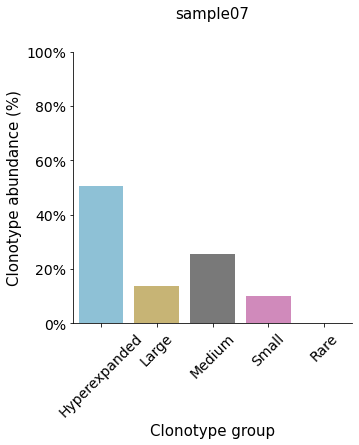

In [13]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample07 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample07']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample07, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample07',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3h.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3h.png",bbox_inches="tight")
plt.show()

## sample08

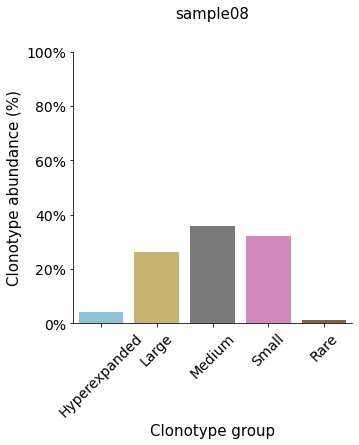

In [14]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample08 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample08']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample08, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample08',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3i.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3i.png",bbox_inches="tight")
plt.show()

## sample09

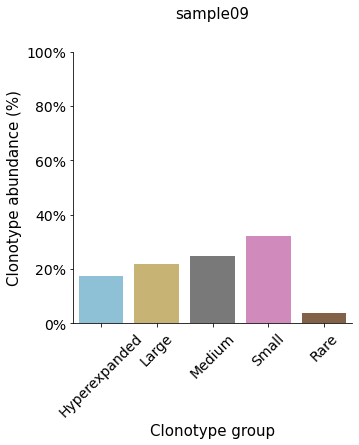

In [15]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample09 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample09']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample09, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample09',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3j.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3j.png",bbox_inches="tight")
plt.show()

## sample10

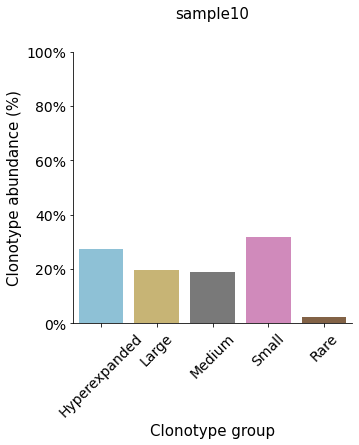

In [16]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample10 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample10']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample10, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample10',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3k.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3k.png",bbox_inches="tight")
plt.show()

## sample11

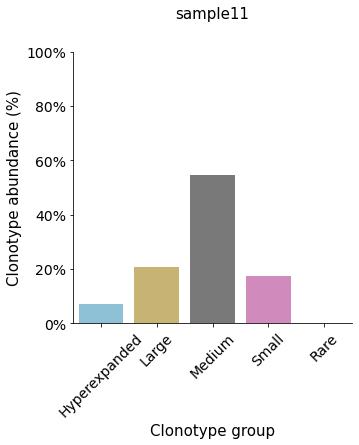

In [17]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample11 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample11']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample11, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample11',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3l.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3l.png",bbox_inches="tight")
plt.show()

## sample12

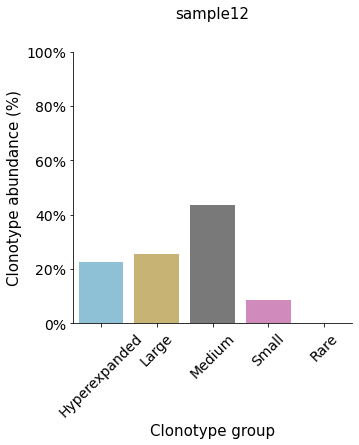

In [18]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample12 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample12']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample12, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample12',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3m.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3m.png",bbox_inches="tight")
plt.show()

## sample14

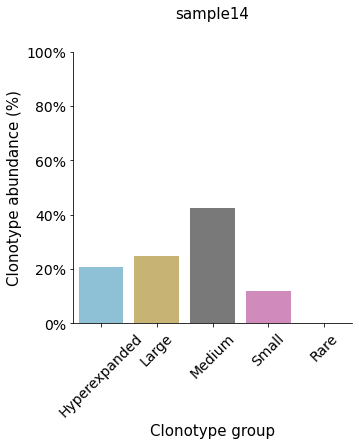

In [19]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_sample14 = TCR_abundance.loc[TCR_abundance['Sample'] == 'sample14']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_sample14, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('sample14',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3n.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3n.png",bbox_inches="tight")
plt.show()

## SRR5233639

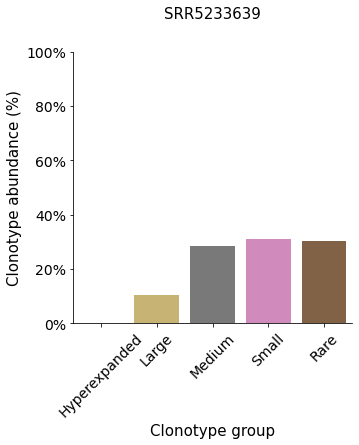

In [20]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_SRR5233639 = TCR_abundance.loc[TCR_abundance['Sample'] == 'SRR5233639']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_SRR5233639, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('SRR5233639',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3o.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3o.png",bbox_inches="tight")
plt.show(block=False)

## SRR5233637

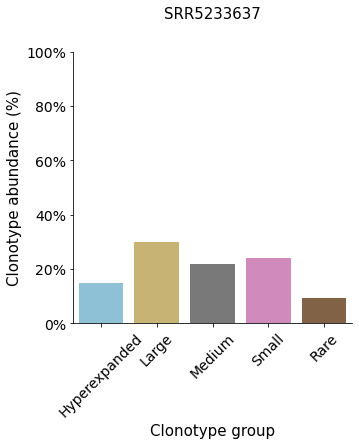

In [21]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_SRR5233637 = TCR_abundance.loc[TCR_abundance['Sample'] == 'SRR5233637']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_SRR5233637, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('SRR5233637',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3p.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3p.png",bbox_inches="tight")
plt.show()

## TCGA-CZ-4862

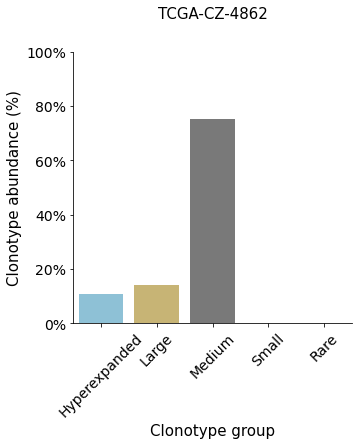

In [22]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_4862 = TCR_abundance.loc[TCR_abundance['Sample'] == 'TCGA-CZ-4862']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_4862, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('TCGA-CZ-4862',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3q.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3q.png",bbox_inches="tight")
plt.show()

## TCGA-CZ-5463

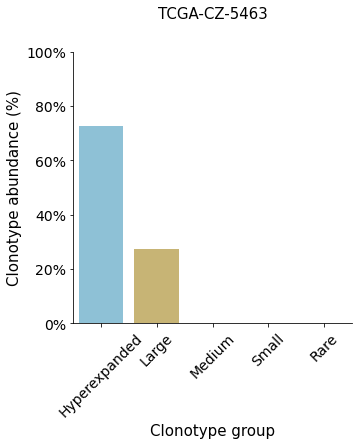

In [23]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_5463 = TCR_abundance.loc[TCR_abundance['Sample'] == 'TCGA-CZ-5463']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_5463, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('TCGA-CZ-5463',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3r.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3r.png",bbox_inches="tight")
plt.show()

## TCGA-CZ-5985

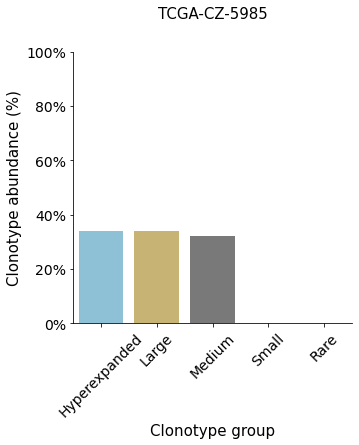

In [24]:
label_order = ['Hyperexpanded','Large','Medium','Small','Rare']
palette = sns.color_palette("muted")
palette.reverse()

df_5985 = TCR_abundance.loc[TCR_abundance['Sample'] == 'TCGA-CZ-5985']

plt.figure(figsize=(5,5))
ax = sns.barplot(x='clonotype_group', y='clonotype_abundance', data=df_5985, order=label_order, palette=palette)
ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Clonotype abundance (%)',fontsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,100)
plt.title('TCGA-CZ-5985',y=1.1,fontsize=15)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("../figures/supplementary/figureS3/figureS3s.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3/figureS3s.png",bbox_inches="tight")
plt.show()

In [25]:
TCR = df.groupby(['Sample','class','tissue_type','repertoire_type','clonotype_group']).size().reset_index(name='clonotype_group_count')

In [26]:
mean2 = TCR.groupby(["repertoire_type",'clonotype_group'])["clonotype_group_count"].agg(["mean", "std"]) 
display(mean2)

mean           std
repertoire_type clonotype_group                            
monoclonal      Hyperexpanded        3.250000      4.500000
                Large               13.000000     16.970563
                Medium              36.750000     18.892238
                Rare              6713.000000           NaN
                Small             2360.333333   1229.952980
polyclonal      Hyperexpanded        6.500000      4.146361
                Large               83.933333     27.665003
                Medium            1870.500000   1346.548965
                Rare             22003.300000  59408.363887
                Small             8815.636364   7022.816846